<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** Brisa Fernanda Gonzalez Arredondo.

**Fecha:** 26 de marzo del 2020.

**Expediente** : IF714993.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 14

## Enunciado de tarea
> 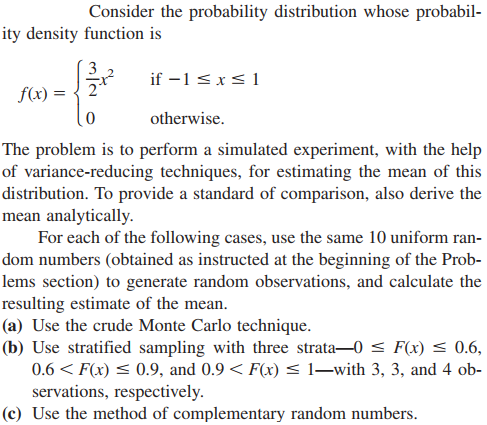

In [19]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd


$$\textbf{Obtener integral} \\ F(x)=\int_{-1}^{x}\frac{3}{2}{x^2}dx$$ 

$$\frac{3}{2}\int_{-1}^{x}{x^2}dx = \frac{3}{2}*\frac{x^3}{3}\Big|_{-1}^{x} $$


$$\mathbf{F(x)_1 = \frac{x^3}{2}+\frac{1}{2}}$$

$$\textbf{Obtener inversa} \\ u=\frac{x^3}{2}+\frac{1}{2}$$ 

$$\frac{x^3}{2}=u-\frac{1}{2}$$

$$x^3=2(u-\frac{1}{2})$$

$$x^3=2u-1$$

$$\mathbf{x=(2u-1)^{1/3}}$$

### Inciso a): 

In [52]:
f_inv = lambda u: np.cbrt(2*u-1)
N = 10

# montecarlo crudo
ui = np.random.rand(N)
m1 = np.mean(f_inv(ui))
m1



0.24097944653924647

### Inciso b): 

In [56]:
# método estratificado 
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
w1 = (3/N)/0.6
w2 = (3/N)/0.3
w3 = (4/N)/0.1
r = [r1,r2,r3]
w = [w1,w2,w3]
xi = list(map(f_inv,r))
xi_es = list(map(lambda x,w:x/w,xi,w))
m2 = np.concatenate(xi_es).mean()

m2

0.08324144439444367

### Inciso c): 

In [58]:
# método números complementarios
ui_c = 1-ui
m_c = f_inv(ui_c).mean()
m3 = (m1+m_c)/2
m3

u_c = np.concatenate([ui,ui_c])
m4 = f_inv(u_c).mean()

m3,m4

(0.0, 5.551115123125783e-18)

### Inciso d)
Use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente.

In [59]:
B=[2,4,6,10]

def mont_estra(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v

ui2=list(map(lambda x:mont_estra(x),B))
z = [np.cbrt(2*i-1) for i in ui2]
m5=[z[i].mean() for i in range(len(z))]
m5

[0.08145237595504912,
 -0.09167343547070936,
 0.01590047547909777,
 -0.005839413287434259]

La diferencia generada en casi todos los métodos es minima, como varía de -1 a 1 tenemos resultados positivos y negativos.